In [55]:
import pandas as pd
data=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')
print(data)

     Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [57]:
# Supprimer la colonne 'Unnamed: 0'
data = data.drop(columns=['Unnamed: 0'])

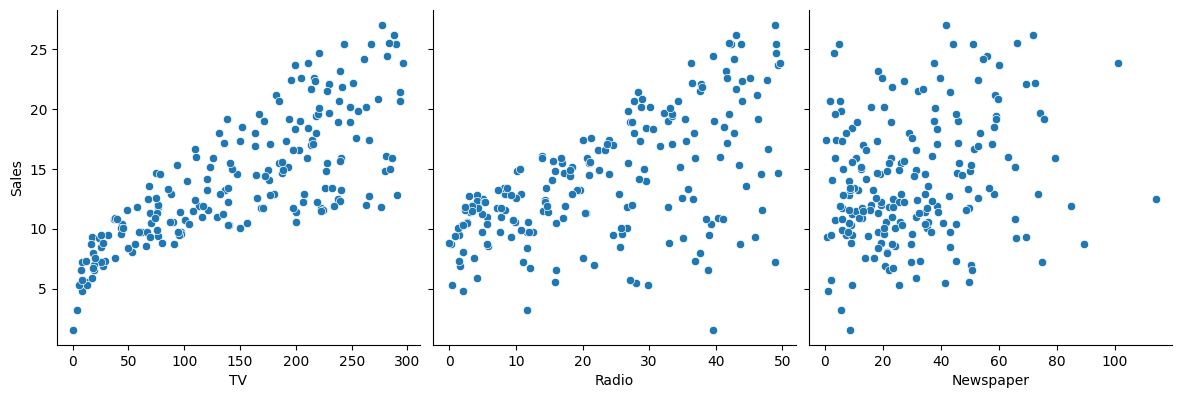

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
# Analyse exploratoire des données
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

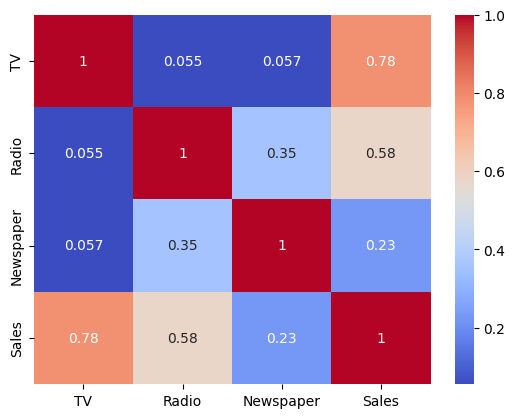

In [59]:
# Matrice de corrélation
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


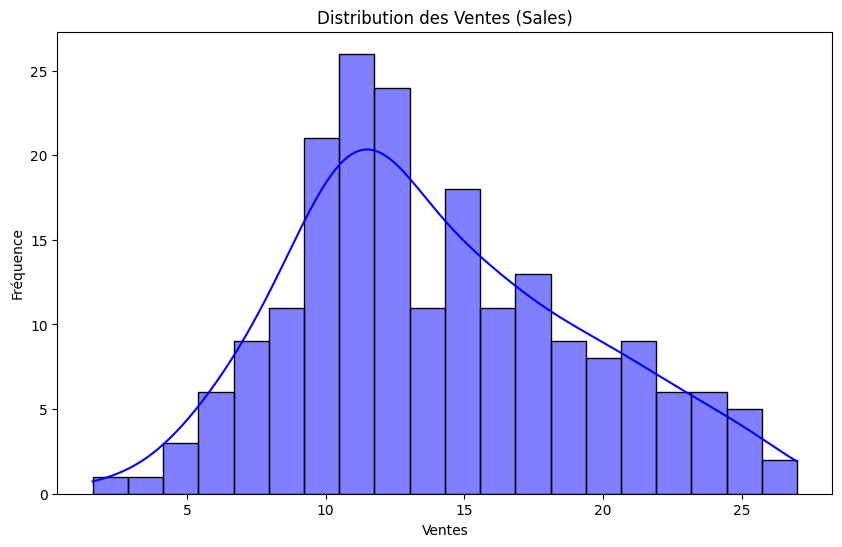

In [60]:
# 1. Afficher la distribution de la colonne cible (Sales)
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True, color='blue', bins=20)
plt.title("Distribution des Ventes (Sales)")
plt.xlabel("Ventes")
plt.ylabel("Fréquence")
plt.show()

In [61]:

# Séparer les données en features et cible
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [62]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor
MAE: 0.618742412127568
MSE: 0.5325817328183275
R²: 0.9831267080346855


In [64]:
import joblib

# Enregistrer le modèle
joblib.dump(gb_model, 'gb_model.pkl')



['gb_model.pkl']

In [65]:
#prediction avec des nouvelles données 
# Créer un DataFrame avec une nouvelle ligne de données
new_data = pd.DataFrame({
    'TV': [185.0],       
    'Radio': [228.0],   
    'Newspaper': [5.8] 
})

# Faire la prédiction
predictions = gb_model.predict(new_data)

# Afficher les prédictions
print("Prédiction des ventes:", predictions[0])


Prédiction des ventes: 21.33596065993473
